## Variables Relacionadas con Fuga:
Los siguientes tres gráficos resumen visualmente los patrones más relevantes observados durante el análisis exploratorio. Cada uno muestra cómo ciertas características están asociadas con una mayor probabilidad de que un conductor deje la empresa.



In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:

df = pd.read_csv(r"C:\Users\igaby\OneDrive\Documents\MEGA\ds_projects\traxion\silver\driver_data_with_messages_fe.csv")

Estadísticas descriptivas:


,driver_id,tag,age,salary,education,marital_status,years_experience,num_prev_employers,trip_duration,distance_traveled,risk_zone,high_prob_leave,message,salario_por_km,experiencia_normalizada,salario_por_duracion,is_solo_provider,zona_alta_y_sueldo_bajo
count,3.000000e+03,3000,3000.000000,3000.000000,3000,3000,3000.000000,3000.000000,3000.000000,3000.000000,3000,3000.000000,3000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
unique,NaN,3,NaN,NaN,4,4,NaN,NaN,NaN,NaN,3,NaN,2997,NaN,NaN,NaN,NaN,NaN
top,NaN,operaciones,NaN,NaN,universidad,viudo,NaN,NaN,NaN,NaN,baja,NaN,Me siento frustrado porque mi salario no refle...,NaN,NaN,NaN,NaN,NaN
freq,NaN,1026,NaN,NaN,757,776,NaN,NaN,NaN,NaN,1020,NaN,2,NaN,NaN,NaN,NaN,NaN
mean,3.700840e+06,NaN,39.445667,4957.505667,NaN,NaN,10.610000,1.994333,95.911333,50.494705,NaN,0.189333,NaN,220.919096,0.244323,83.294961,0.084667,0.117667
std,1.452874e+05,NaN,11.283712,1745.211969,NaN,NaN,9.132636,1.406044,48.436242,28.264764,NaN,0.391838,NaN,422.223782,0.175977,92.431174,0.278431,0.322267
min,3.450215e+06,NaN,20.000000,2001.000000,NaN,NaN,0.000000,0.000000,10.000000,1.032686,NaN,0.000000,NaN,20.212604,0.000000,11.931360,0.000000,0.000000
25%,3.576066e+06,NaN,30.000000,3404.750000,NaN,NaN,3.000000,1.000000,55.000000,26.943120,NaN,0.000000,NaN,63.457934,0.090909,32.922120,0.000000,0.000000
50%,3.700752e+06,NaN,39.000000,4970.500000,NaN,NaN,8.000000,2.000000,97.000000,50.345184,NaN,0.000000,NaN,99.506901,0.220169,52.487877,0.000000,0.000000
75%,3.825435e+06,NaN,49.000000,6469.250000,NaN,NaN,16.000000,3.000000,136.000000,74.114489,NaN,0.000000,NaN,188.684755,0.384615,92.714304,0.000000,0.000000


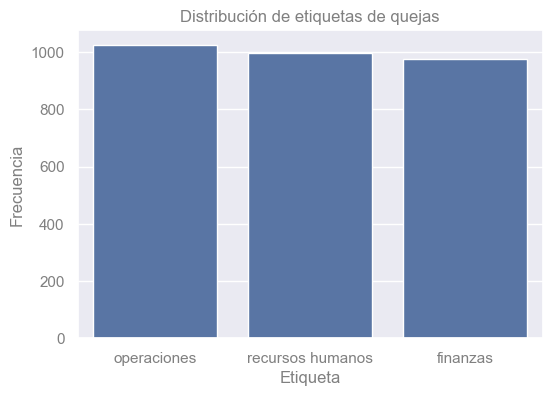

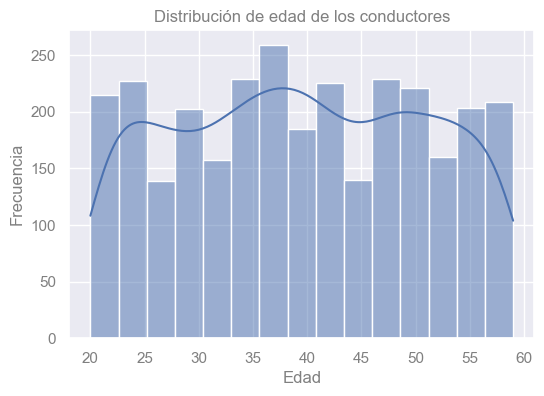

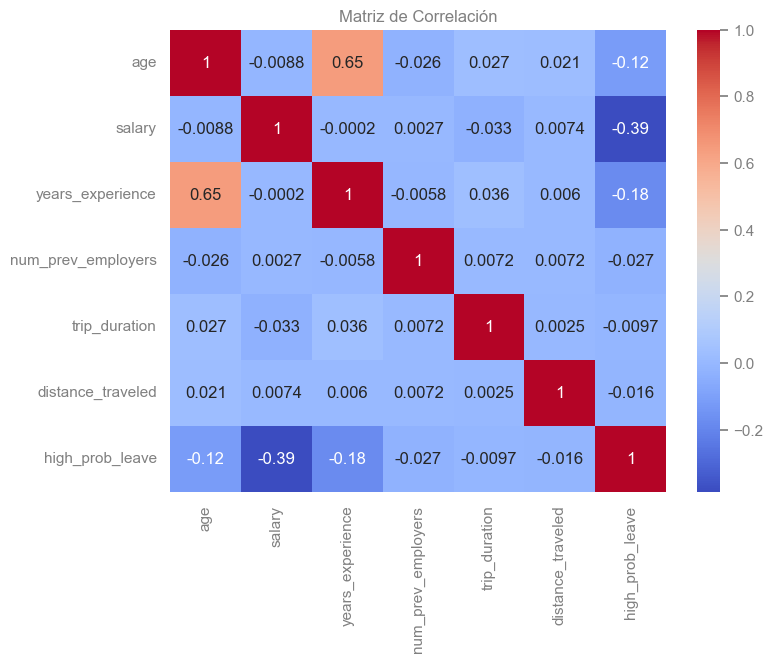

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis descriptivo básico
print("Estadísticas descriptivas:")
display(df.describe(include='all'))

# Distribución de las etiquetas de quejas
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='tag')
plt.title("Distribución de etiquetas de quejas")
plt.xlabel("Etiqueta")
plt.ylabel("Frecuencia")
plt.show()

# Distribución de la edad de los conductores
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=15, kde=True)
plt.title("Distribución de edad de los conductores")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Matriz de correlación de variables numéricas
numeric_cols = ['age', 'salary', 'years_experience', 'num_prev_employers', 'trip_duration', 'distance_traveled', 'high_prob_leave']
plt.figure(figsize=(8,6))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

#### Experiencia normalizada vs probabilidad de fuga
Este gráfico muestra que los conductores con menor experiencia relativa (es decir, con pocos años de experiencia en relación con su edad) presentan una mayor propensión a abandonar la empresa. Esto puede reflejar un menor compromiso, menor arraigo o una etapa temprana en su vida laboral, donde la rotación es más frecuente.

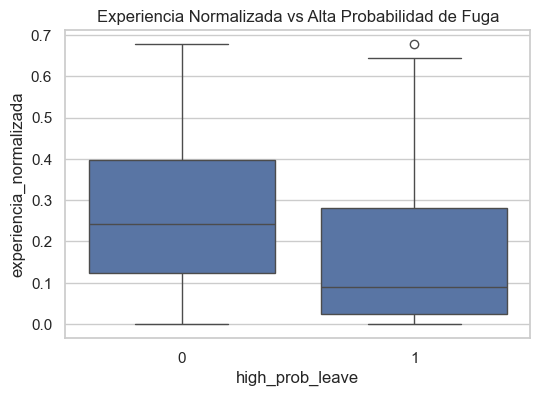

In [8]:
# Estilo
sns.set(style="whitegrid")

# 🔹 1. Boxplot de experiencia normalizada vs alta probabilidad de fuga
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="high_prob_leave", y="experiencia_normalizada")
plt.title("Experiencia Normalizada vs Alta Probabilidad de Fuga")
plt.xlabel("high_prob_leave")
plt.ylabel("experiencia_normalizada")
plt.show()

#### Zona de riesgo alta y sueldo bajo
Aquí se evidencia un patrón crítico: los conductores que trabajan en zonas catalogadas como peligrosas y además reciben un salario bajo tienen una tasa de fuga significativamente mayor. Esta combinación representa una situación de alto riesgo que puede requerir acciones inmediatas (como bonos, rotación de zona o mejora salarial).


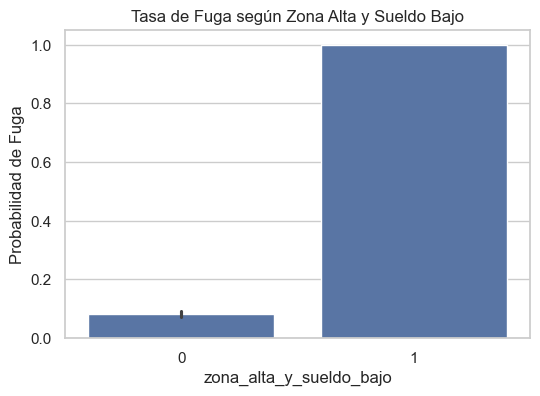

In [9]:

# 🔹 2. Barplot de zona de riesgo alta + sueldo bajo
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x="zona_alta_y_sueldo_bajo", y="high_prob_leave")
plt.title("Tasa de Fuga según Zona Alta y Sueldo Bajo")
plt.xlabel("zona_alta_y_sueldo_bajo")
plt.ylabel("Probabilidad de Fuga")
plt.show()

### Relación multivariada entre salario, salario por kilómetro y fuga
Este gráfico de dispersión muestra que la mayoría de los casos de alta probabilidad de fuga se concentran en zonas de bajo salario y bajo ingreso por kilómetro recorrido. No es solo cuánto se gana, sino cuánto se gana en proporción al esfuerzo. Esta interacción entre múltiples variables refuerza la hipótesis de que el descontento surge por una percepción de inequidad en la compensación.

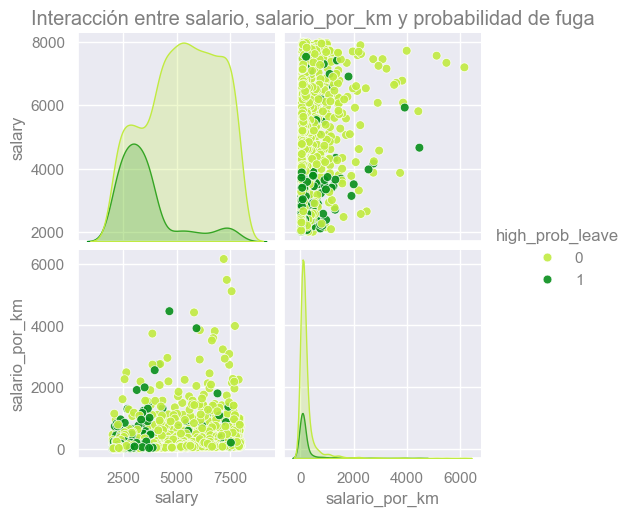

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar estilo y colores de texto
sns.set_style("whitegrid")
sns.set_context("notebook")
sns.set(rc={
    "text.color": "gray",
    "axes.labelcolor": "gray",
    "xtick.color": "gray",
    "ytick.color": "gray"
})

# Paleta personalizada para hue=0 y hue=1
custom_palette = {
    0: "#c1eb4190",  # Color con transparencia
    1: "#078e1bff"   # Color sin transparencia (alfa=FF)
}

# Pairplot con la nueva paleta
sns.pairplot(
    df[["salary", "salario_por_km", "high_prob_leave"]],
    hue="high_prob_leave",
    palette=custom_palette,
    plot_kws={"alpha": 0.9, "s": 40}
)

# Título de la figura en gris
plt.suptitle("Interacción entre salario, salario_por_km y probabilidad de fuga", 
             y=1.02, 
             color='gray')

plt.show()

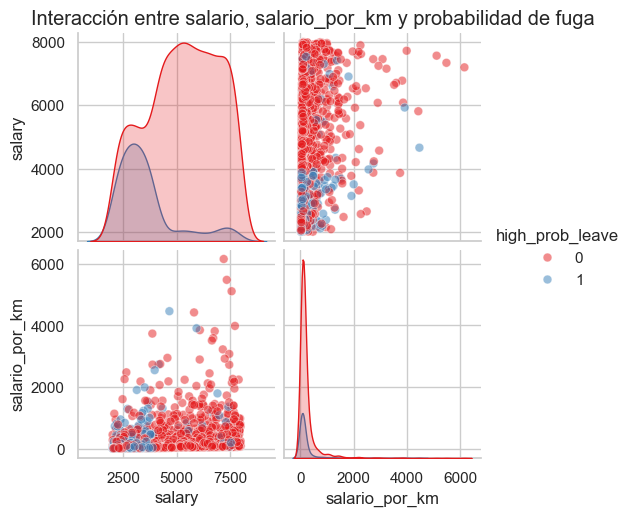

In [5]:
# 🔹 3. Pairplot de salario, salario_por_km y fuga
sns.pairplot(
    df[["salary", "salario_por_km", "high_prob_leave"]],
    hue="high_prob_leave",
    palette="Set1",
    plot_kws={"alpha": 0.5, "s": 40}
)
plt.suptitle("Interacción entre salario, salario_por_km y probabilidad de fuga", y=1.02)
plt.show()